In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 定义画图函数
def plot_illusion(grey_low,grey_high,grey_middle,width,locate):
    '''
    注：灰度值越大，颜色越浅。黑色表示灰度值为0，白色表示灰度值为1。
    grey_low: 左图的背景灰度值，范围在0到1之间，数值越小，背景颜色越浅
    grey_high: 右图的背景灰度值，范围在0到1之间，数值越小，背景颜色越浅
    grey_middle: 中间方块的灰度值，范围在0到1之间，数值越小，方块越浅
    width: 方块的宽度
    locate: 方块左上角在图像中的位置，为二元组(x, y)
    '''
    gray_square = np.ones((width, width, 3)) * grey_middle
    gray_low_bg = np.ones((300, 300, 3)) * grey_low
    gray_low_bg[locate[0]:locate[0]+width, locate[1]:locate[1]+width, :] = gray_square
    gray_high_bg = np.ones((300, 300, 3)) * grey_high
    gray_high_bg[locate[0]:locate[0]+width, locate[1]:locate[1]+width, :] = gray_square

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(gray_low_bg)
    ax[0].set_title(f'background={grey_low},grey_middle={grey_middle}')
    ax[0].axis('off')
    ax[1].imshow(gray_high_bg)
    ax[1].set_title(f'background={grey_high},grey_middle={grey_middle}')
    ax[1].axis('off')
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)
    plt.show()

def plot_illusions(inputs):
  for i, (grey_low,grey_high,grey_middle,width,locate) in enumerate(inputs):
    plot_illusion(grey_low,grey_high,grey_middle,width,locate)
  plt.show()

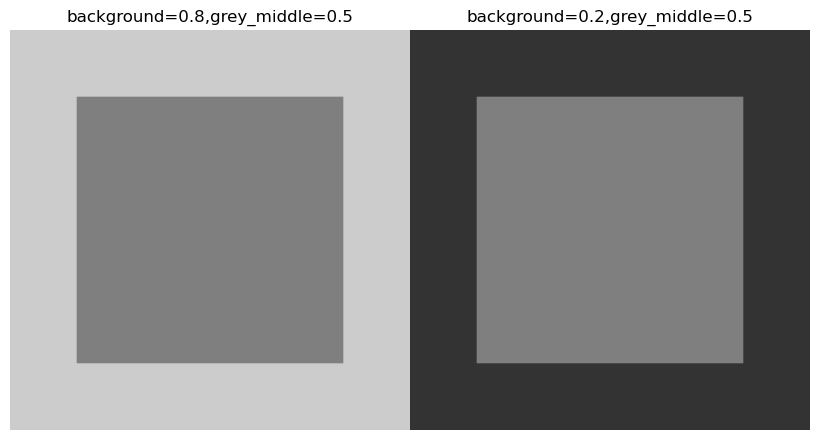

In [3]:
grey_low=0.8
grey_high=0.2
grey_middle=0.5
width=200
locate=[50,50]
plot_illusion(grey_low,grey_high,grey_middle,width,locate)

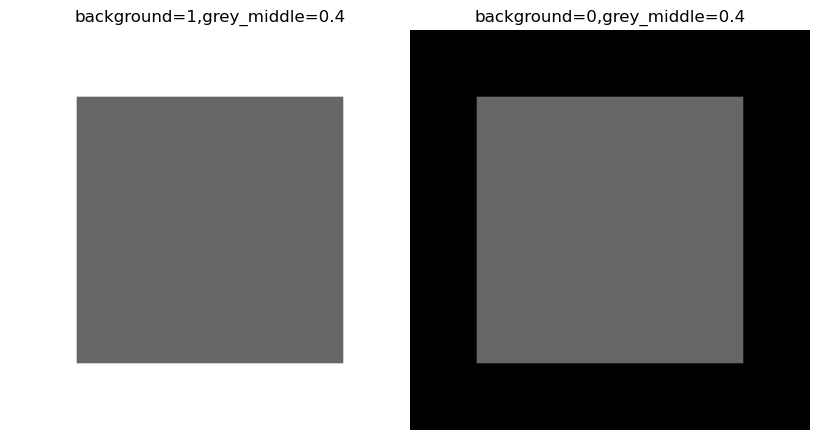

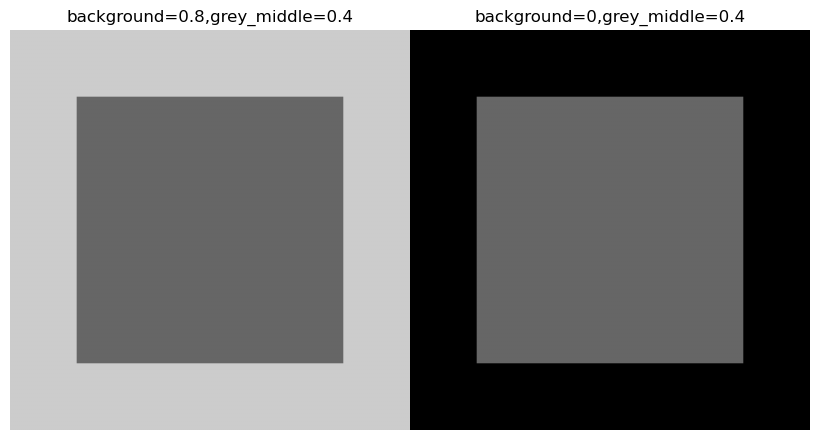

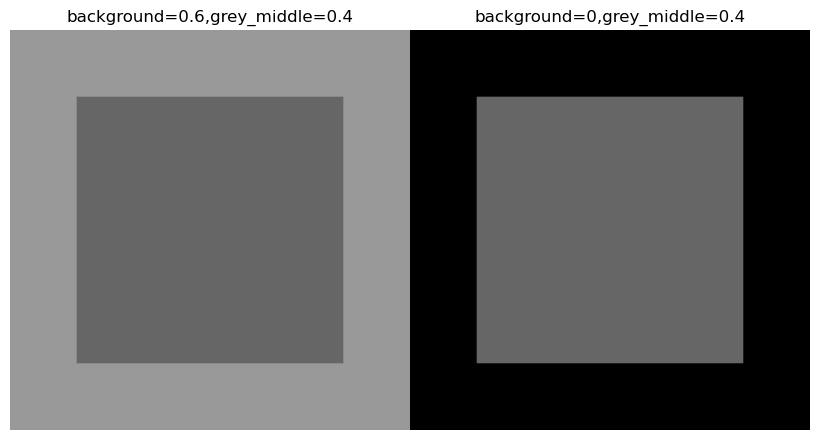

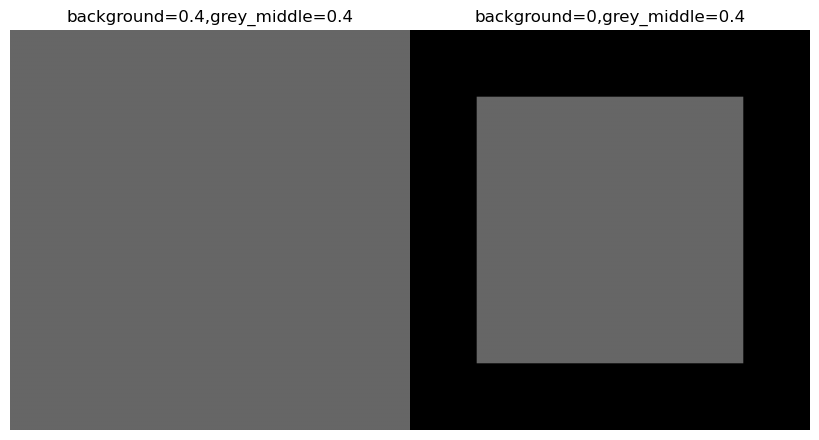

In [18]:
inputs1 = [(1, 0, x, 200, (50, 50)) for x in [0.6, 0.5, 0.4]] + \
        [(0.8, 0.2, x, 200, (50, 50)) for x in [0.6, 0.5, 0.4]] + \
        [(0.6, 0.4, x, 200, (50, 50)) for x in [0.6, 0.5, 0.4]]
inputs2 = [(a, 0, x, 200, (50, 50)) for a in [1, 0.8,0.6,0.4] for x in [0.4]]
inputs3 = [(1, a, x, 200, (50, 50)) for a in [1, 0.8,0.6,0.4] for x in [0.5]]
inputs4 = [(0.7, 0.3, x, 200, (50, 50)) for x in [1, 0.8,0.6,0.5,0.4,0.2]]
plot_illusions(inputs2)

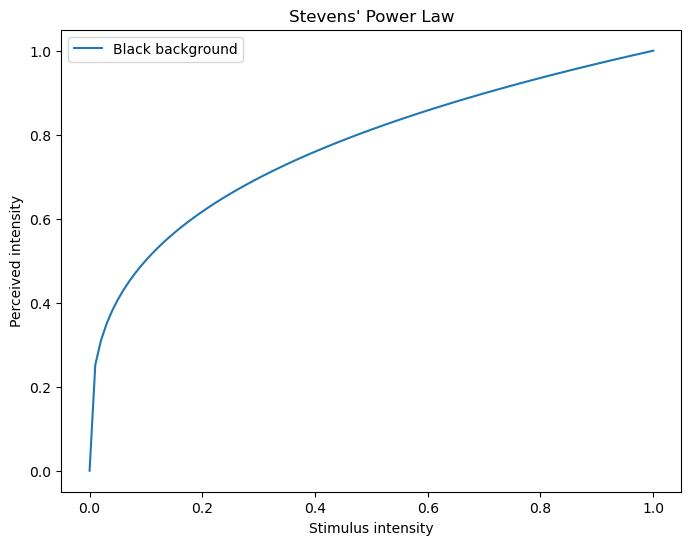

In [20]:
'''
Stevens' Power Law（史蒂文斯幂律）来描述。Stevens' Power Law 是一种描述物理感知量和心理感知量之间关系的经验规律，它可以用来解释为什么相同强度的刺激在不同背景下会被感知为不同的强度。该定律的公式如下：
S = kI^a
其中，S是感知强度，I是刺激强度，k和a是实验测量得到的常数，其中a被称为幂指数。对于颜色亮度，实验测量结果表明，幂指数a的值通常在0.3到0.5之间。
'''
def stevens_power_law(I, a, k):
    return k * I**a

# 颜色亮度幂指数 a
a = 0.3

# 常数 k
k = 1

# 刺激强度 I
I = np.linspace(0, 1, 100)

# 在黑色背景和白色背景下的感知强度 S
S_black_bg = stevens_power_law(I, a, k)
S_white_bg = stevens_power_law(I, a, k)

# 绘制结果
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(I, S_black_bg, label='Black background')
ax.set_xlabel('Stimulus intensity')
ax.set_ylabel('Perceived intensity')
ax.set_title('Stevens\' Power Law')
ax.legend()
plt.show()

In [13]:
def plot_illusions(inputs):
  n = len(inputs)
  for i, (grey_low,grey_high,grey_middle,width,locate) in enumerate(inputs):
    plot_illusion(grey_low,grey_high,grey_middle,width,locate)
  plt.show()

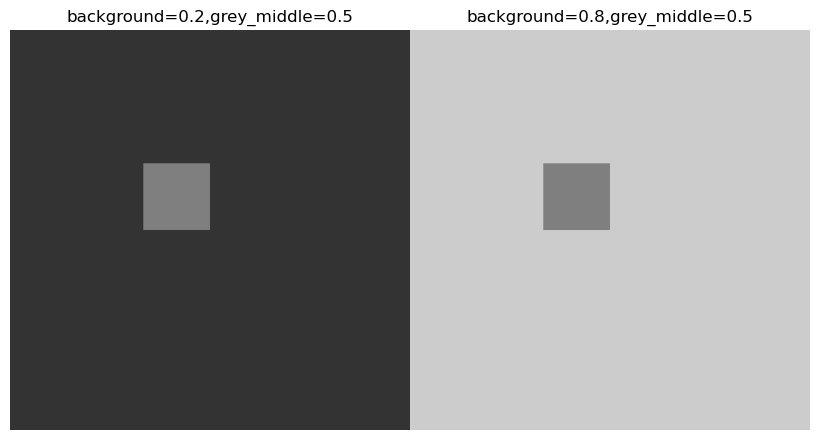

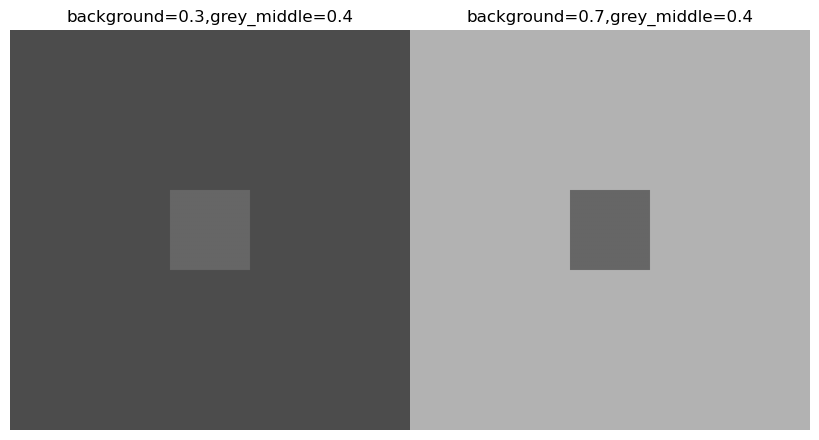

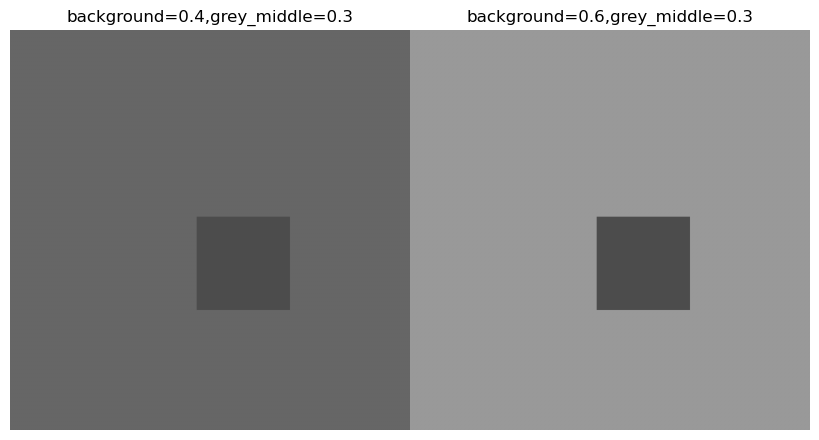

In [14]:
inputs = [
    (0.2, 0.8, 0.5, 50, (100, 100)),
    (0.3, 0.7, 0.4, 60, (120, 120)),
    (0.4, 0.6, 0.3, 70, (140, 140))
]
plot_illusions(inputs)